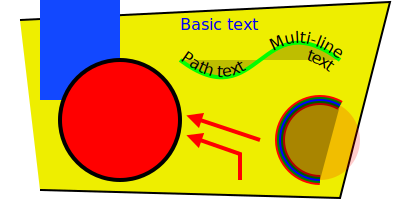

In [6]:
import drawsvg as draw
import random
import qrcode
import qrcode.image.svg


d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
d.save_svg('example.svg')
d.save_png('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG

In [7]:

#qr_img = qrcode.make('Some data here', image_factory=factory)

40052


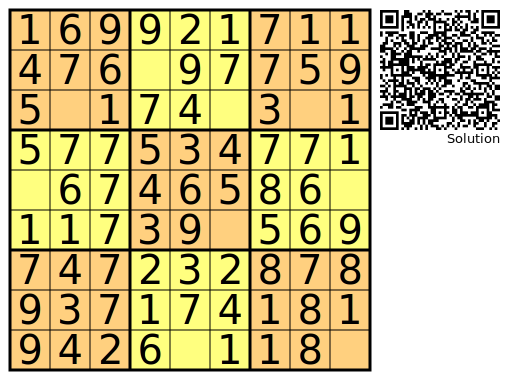

In [8]:

cell_size = 40
board_size = cell_size * 9
padding = 10
drawing_size = board_size + (2 * padding)

bg_color = "none" #"red" #
box_bg_color1 = "orange"
box_bg_color2 = "yellow"
box_bg_opacity1 = 0.5
box_bg_opacity2 = 0.5
thin_line_width = 1
thick_line_width = 3

fontsize = cell_size
numbercolor = "black"

include_qr_solution = True
qr_size = cell_size*3
qr_data = "123|456|789\n"*9
cells = [[random.randint(0,9) for c in range(9)] for r in range(9)]


drawing_width = drawing_size + (qr_size+padding if include_qr_solution else 0)
s = draw.Drawing(width=drawing_width , height=drawing_size)

background = draw.Rectangle(
    0, 0, drawing_width, drawing_size, stroke="none", fill=bg_color
)
s.append(background)

# box-background
for r in range(3):
    for c in range(3):
        if (r + c) % 2 == 0:
            box_bg_color = box_bg_color1
            box_bg_opacity = box_bg_opacity1

        else:
            box_bg_color = box_bg_color2
            box_bg_opacity = box_bg_opacity2

        box_size = cell_size * 3
        x_start = padding + box_size * c
        y_start = padding + box_size * r

        s.append(
            draw.Rectangle(
                x_start, y_start, box_size, box_size, stroke="none", fill=box_bg_color, fill_opacity=box_bg_opacity
            )
        )


outer_square = draw.Rectangle(
    padding,
    padding,
    board_size,
    board_size,
    stroke_width=thick_line_width,
    stroke="black",
    fill="none",
)
s.append(outer_square)

# thin gridlines
for i in range(1, 9):
    line_thickness = thin_line_width
    if i % 3 == 0:
        line_thickness = thick_line_width

    coord = padding + i * cell_size
    h_gridline = draw.Line(
        padding,
        coord,
        padding + board_size,
        coord,
        stroke_width=line_thickness,
        stroke="black",
        fill="none",
    )
    s.append(h_gridline)
    v_gridline = draw.Line(
        coord,
        padding,
        coord,
        padding + board_size,
        stroke_width=line_thickness,
        stroke="black",
        fill="none",
    )
    s.append(v_gridline)

for row in range(9):
    for col in range(9):
        cell_value = cells[row][col]

        if cell_value != 0:
            s.append(
                draw.Text(
                    str(cell_value),
                    fontsize,
                    padding + (cell_size // 2) + (col * cell_size),
                    padding + (cell_size // 2) + (row * cell_size),
                    text_anchor="middle",
                    dominant_baseline="central",#"middle",#
                    fill=numbercolor
                )
            )

if include_qr_solution:

# https://github.com/lincolnloop/python-qrcode

    method = "nothing" # "basic" #

    if method == 'basic':
        # Simple factory, just a set of rects.
        factory = qrcode.image.svg.SvgImage
    elif method == 'fragment':
        # Fragment factory (also just a set of rects)
        factory = qrcode.image.svg.SvgFragmentImage
    else:
        # Combined path factory, fixes white space that may occur when zooming
        factory = qrcode.image.svg.SvgPathImage


    qr = qrcode.QRCode(box_size=3,border=0)
    qr.add_data(qr_data)
    qr_img2 = qr.make_image(image_factory=factory,fill_color="green", back_color="red")

    s.append(draw.Image(drawing_size,padding,qr_size, qr_size, data=qr_img2.to_string(), mime_type='image/svg+xml', embed=True))
    s.append(
                draw.Text(
                    "Solution",
                    fontsize//3,
                    drawing_width-padding,
                    qr_size+padding,
                    text_anchor="end",
                    dominant_baseline="hanging",#"middle",#
                    fill=numbercolor
                )
            )
print(len(s.as_svg()))
s

In [9]:
int("123456789"*9) # store

123456789123456789123456789123456789123456789123456789123456789123456789123456789